<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/mushrooms%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [3]:
# Load the dataset

data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Q1: Calculate entropy of the dataset with respect to classification
def calculate_entropy(column):
    probabilities = column.value_counts(normalize=True)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

entropy = calculate_entropy(data['class'])
print("Entropy of the dataset with respect to classification:", entropy)

Entropy of the dataset with respect to classification: 0.9990678968724603


In [5]:
# Q2: Compute Information Gain for "Cap-Color"
def calculate_information_gain(data, target_column, feature_column):
    total_entropy = calculate_entropy(data[target_column])
    feature_values = data[feature_column].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature_column] == value]
        weighted_entropy += (len(subset) / len(data)) * calculate_entropy(subset[target_column])
    info_gain = total_entropy - weighted_entropy
    return info_gain

info_gain_cap_color = calculate_information_gain(data, 'class', 'cap-color')
print("Information Gain for 'Cap-Color':", info_gain_cap_color)

Information Gain for 'Cap-Color': 0.0360492829762038


In [7]:
# Q3: Determine the next attribute for the decision tree
def find_next_attribute(data, target_column, selected_feature):
    remaining_features = [col for col in data.columns if col not in [target_column, selected_feature]]
    info_gains = {feature: calculate_information_gain(data, target_column, feature) for feature in remaining_features}
    next_feature = max(info_gains, key=info_gains.get)
    return next_feature, info_gains[next_feature]

next_feature, next_info_gain = find_next_attribute(data, 'class', 'cap-color')
print(f"Next attribute after 'Cap-Color': {next_feature}, Information Gain: {next_info_gain}")

Next attribute after 'Cap-Color': odor, Information Gain: 0.9060749773839998


In [8]:

# Q4: Calculate expected misclassification rate
def expected_misclassification_rate(column):
    probabilities = column.value_counts(normalize=True)
    misclassification_rate = 1 - max(probabilities)
    return misclassification_rate

misclassification_rate = expected_misclassification_rate(data['class'])
print("Expected misclassification rate:", misclassification_rate)


Expected misclassification rate: 0.482028557360906


In [9]:
# Q5: Exploratory Data Analysis
print("\nSummary Statistics:\n", data.describe(include='all'))


Summary Statistics:
        class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1

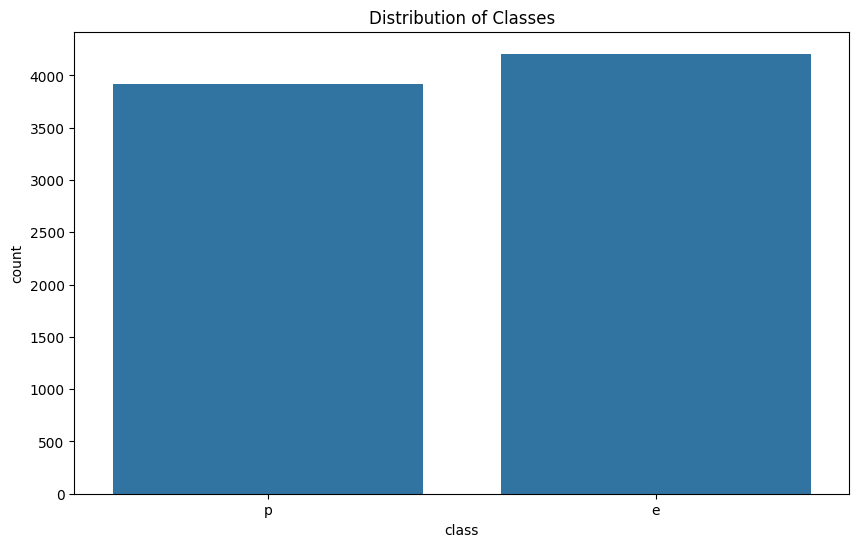

In [10]:
# Distribution analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data)
plt.title("Distribution of Classes")
plt.show()

In [11]:
# Visualize relationship between variables
sns.pairplot(data, hue='class')
plt.show()

ValueError: No variables found for grid columns.

In [12]:
# Q6: Apply Machine Learning Models
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [13]:
# Split data
X = data.drop(columns=['class'])
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:

# Models to train
models = {
    'GaussianNB': GaussianNB(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [17]:
# Evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [18]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)

                Model  Accuracy  Precision    Recall  F1-Score
0          GaussianNB  0.929450   0.927905  0.926334  0.927119
1        RandomForest  1.000000   1.000000  1.000000  1.000000
2        DecisionTree  1.000000   1.000000  1.000000  1.000000
3  LogisticRegression  0.949139   0.952096  0.942422  0.947234
4                 SVC  0.989336   0.997416  0.980525  0.988898
5                 KNN  0.995898   0.992431  0.999153  0.995781
6             XGBoost  1.000000   1.000000  1.000000  1.000000


In [19]:
# Q7: Identify the best model
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print("\nBest Model:")
print(best_model)


Best Model:
Model        RandomForest
Accuracy              1.0
Precision             1.0
Recall                1.0
F1-Score              1.0
Name: 1, dtype: object
